# Stock Market Data (2000-2021) |TATA MOTORS | EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

# Loading the libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the dataset

In [3]:
tm = pd.read_csv("/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv")
tm.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [4]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [5]:
# Basic information about the dataset
print(tm.info())

# Check the first few rows
print(tm.head())

# Check for missing values
print(tm.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [6]:
# Fill missing 'Trades' and 'Deliverable Volume' with appropriate values
tm['Trades'] = tm['Trades'].fillna(0)
tm['Deliverable Volume'] = tm['Deliverable Volume'].fillna(0)
tm['%Deliverble'] = tm['%Deliverble'].fillna(0)

# Confirm there are no missing values
print(tm.isnull().sum())


Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [7]:
# Convert 'Date' column to datetime
tm['Date'] = pd.to_datetime(tm['Date'])

# Verify the changes
print(tm['Date'].dtype)


datetime64[ns]


# Visualizations

**1. Distribution of Volume Traded**

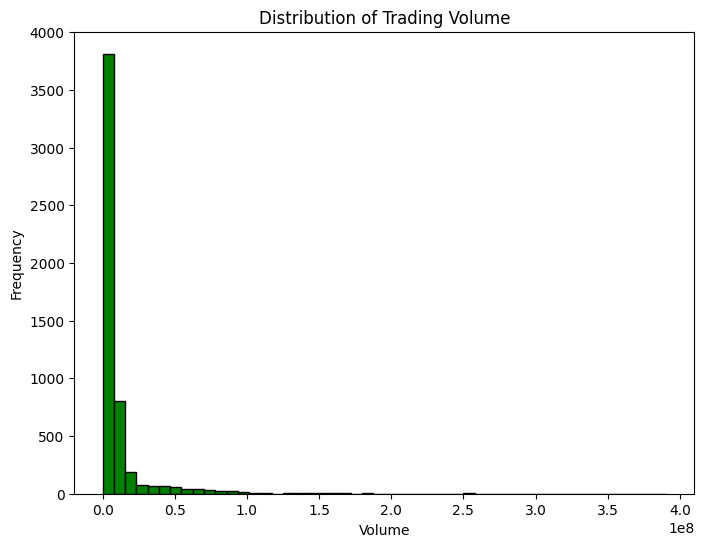

In [8]:
# Histogram for volume 
plt.figure(figsize=(8,6))
plt.hist(tm['Volume'], bins=50, color='green',edgecolor='black')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

This histogram represents the distribution of trading volumes, showing a highly skewed pattern. Here are the key insights:

1. **High Frequency of Low Trading Volumes**:
   - The majority of trading volumes are concentrated near the lower end of the scale, as indicated by the tall bar on the far left.
   - This suggests that many transactions involve relatively small volumes.

2. **Long Tail to the Right**:
   - The distribution has a long right tail, meaning a smaller number of trades involve very large volumes.
   - These could represent major trades, possibly from institutional investors or significant market events.

3. **Skewness**:
   - The data is positively (right) skewed, as trading volumes increase dramatically in magnitude but occur less frequently.
   - This is a common pattern in financial markets where a few trades dominate overall activity.

**2 Top 5 stocks with Highest Average Closing Prices**

Symbol
TATAMOTORS    470.561121
TELCO         145.982332
Name: Close, dtype: float64


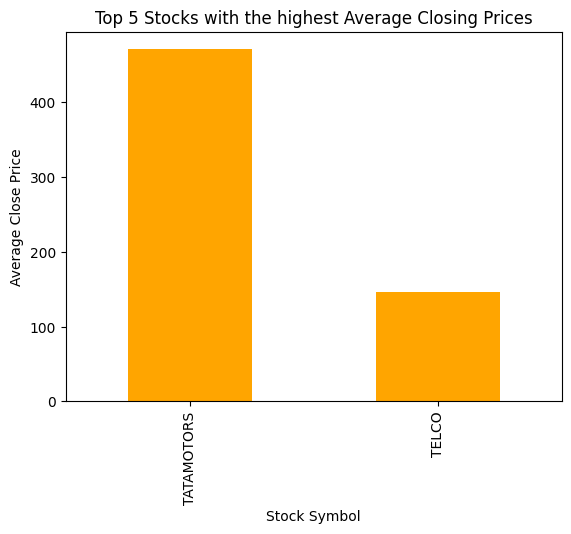

In [9]:
# Group by Symbol and calculate mean Close prices 
top_stocks = tm.groupby('Symbol')['Close'].mean().sort_values(ascending=False).head(5)
print(top_stocks)

# PLot the top 5 stocks 
top_stocks.plot(kind='bar', color='orange')
plt.title('Top 5 Stocks with the highest Average Closing Prices')
plt.xlabel('Stock Symbol')
plt.ylabel('Average Close Price')
plt.show()

* TATAMOTORS again leads significantly in terms of average closing price.
* Thoughts: This reflects its premium pricing relative to other stocks in the dataset. This is valuable for identifying high-value stocks that might appeal to long-term investors.

**3. Correlation Heatmap**

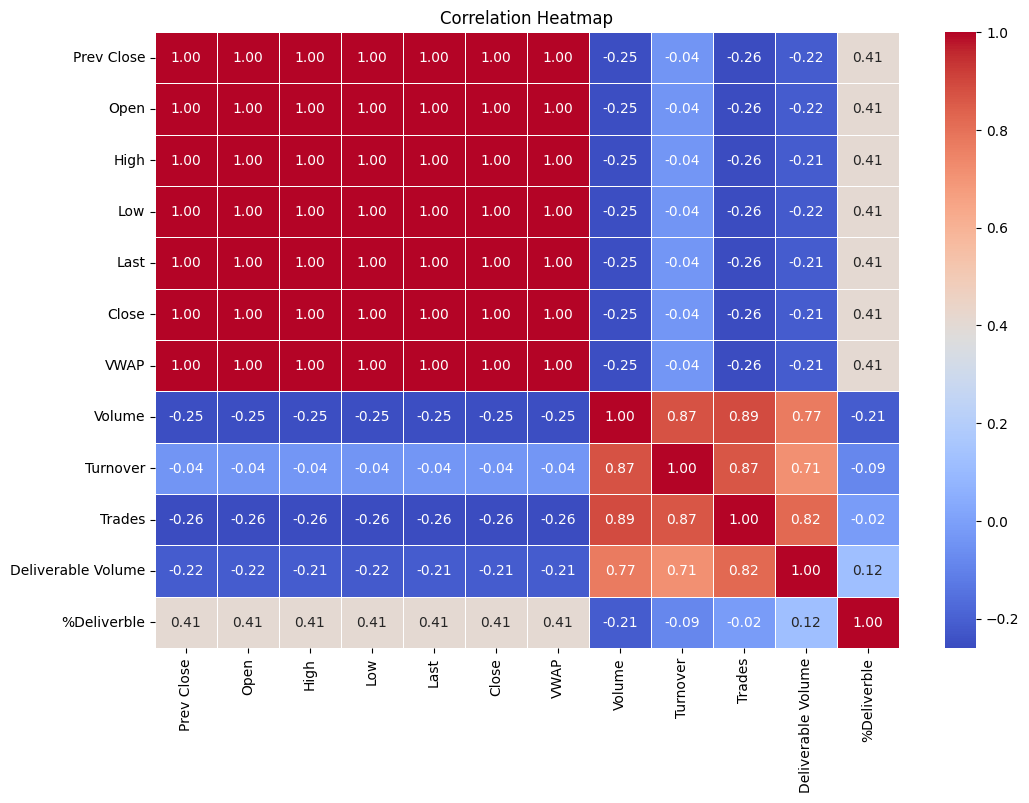

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_df = tm.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Observation:
* High correlations (red areas) between High, Low, Close, VWAP, etc., indicate these variables move closely together.
* Volume and Trades have moderate to high correlations with Turnover.
* % Deliverable shows weak correlation with most features.
* Thoughts: This is useful for identifying which features might be predictive of one another. For instance, Turnover and Trades seem related, while % Deliverable might be an outlier or need further analysis.

**4. Volatility Analysis**

Symbol
TATAMOTORS    16.933283
TELCO          6.362663
Name: Volatility, dtype: float64


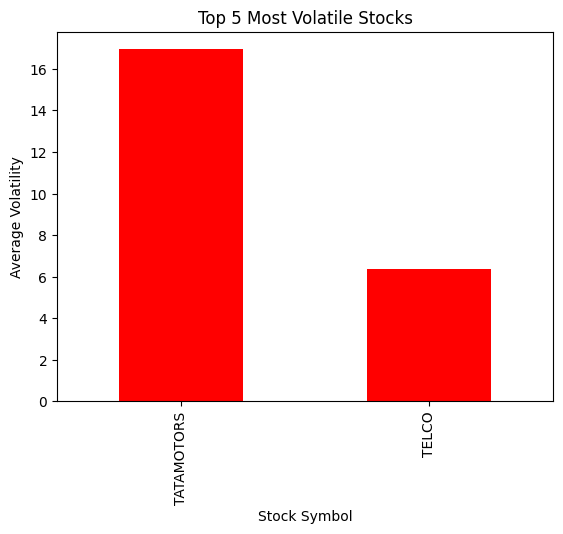

In [11]:
# Add volatility column
tm['Volatility'] = tm['High'] - tm['Low']

# Sort the most volatile stocks 
most_volatile = tm.groupby('Symbol')['Volatility'].mean().sort_values(ascending=False).head(5)
print(most_volatile)

# Plot the top 5 most volatile stocks 
most_volatile.plot(kind='bar', color='red')
plt.title('Top 5 Most Volatile Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Average Volatility')
plt.show()

* TATAMOTORS is significantly more volatile compared to TELCO.
* Thoughts: This is great for investors focusing on volatility strategies. Highlighting such stocks is useful for traders aiming to profit from rapid price movements.

# Answering Questions

**1. What is the stock with the highest trading volume?**

In [12]:
# Stock with the highest trading volume

highest_volume = tm.loc[tm['Volume'].idxmax()]
print("Stock with the highest trading volumes")
print(highest_volume)

Stock with the highest trading volumes
Date                  2021-01-12 00:00:00
Symbol                         TATAMOTORS
Series                                 EQ
Prev Close                         220.65
Open                                227.0
High                                252.4
Low                                 224.1
Last                               237.25
Close                               237.8
VWAP                               238.18
Volume                          390577839
Turnover               9302949546045000.0
Trades                          1303825.0
Deliverable Volume             23171897.0
%Deliverble                        0.0593
Volatility                           28.3
Name: 5233, dtype: object


**2. Which stock has the highest average closing price?**

In [13]:
# Stock with the highest average closing price 
avg_closing = tm.groupby('Symbol')['Close'].mean().idxmax()
highest_avg_close = tm.groupby('Symbol')['Close'].mean().max()
print(f"The stock with the highest average closing price is {avg_closing} with an average close of {highest_avg_close: .2f}")

The stock with the highest average closing price is TATAMOTORS with an average close of  470.56


**3. What is the most volatile stock?**

In [14]:
# calculate the volatility as the standard deviation of the closing price

tm['Volatility'] = tm.groupby('Symbol')['Close'].transform('std')
most_volatile = tm.groupby('Symbol')['Volatility'].mean().idxmax()
highest_volatility = tm.groupby('Symbol')['Volatility'].mean().max()
print(f"The most volatile stock is {most_volatile} with a volatility of {highest_volatility:.2f}")

The most volatile stock is TATAMOTORS with a volatility of 264.94


**4. What is the correlation between trading volume and closing price?**

In [15]:
# Correlation between trading volume and closing price
corr = tm[['Volume','Close']].corr().iloc[0,1]
print(f"The correlation between trading volume and closing price is {corr:.2f}")

The correlation between trading volume and closing price is -0.25


**5. What is the stock with the highest turnover?**

In [16]:
# Stock with the highest turnover
highest_turnover = tm.loc[tm['Turnover'].idxmax()]
print("Stock with the highest turnover:")
print(highest_turnover)

Stock with the highest turnover:
Date                  2021-01-22 00:00:00
Symbol                         TATAMOTORS
Series                                 EQ
Prev Close                          290.6
Open                               295.95
High                                306.9
Low                                278.35
Last                               290.85
Close                              289.35
VWAP                               296.37
Volume                          316008609
Turnover               9365670736420000.0
Trades                          1318669.0
Deliverable Volume             23030772.0
%Deliverble                        0.0729
Volatility                     264.943151
Name: 5241, dtype: object


**6. What is the stock with the maximum percentage deliverable volume?**

In [17]:
# Stock with maximum % deliverable volume
max_deliverable = tm.loc[tm['%Deliverble'].idxmax()]
print("Stock with maximum percentage deliverable volume:")
print(max_deliverable)

Stock with maximum percentage deliverable volume:
Date                  2009-05-18 00:00:00
Symbol                         TATAMOTORS
Series                                 EQ
Prev Close                         265.25
Open                                285.0
High                                315.0
Low                                 285.0
Last                                305.0
Close                               301.3
VWAP                                300.4
Volume                              12351
Turnover                   371020765000.0
Trades                                0.0
Deliverable Volume                12351.0
%Deliverble                           1.0
Volatility                     264.943151
Name: 2339, dtype: object


**7. What is the stock with the maximum price change in a day?**

In [18]:
# Maximum price change in a day (High - Low)
tm['Price_Change'] = tm['High'] - tm['Low']
max_price_change = tm.loc[tm['Price_Change'].idxmax()]
print(max_price_change)

Date                  2006-05-22 00:00:00
Symbol                         TATAMOTORS
Series                                 EQ
Prev Close                          844.8
Open                                851.0
High                                918.0
Low                                 688.0
Last                               762.05
Close                               761.8
VWAP                               771.43
Volume                            3977737
Turnover                306855289790000.0
Trades                                0.0
Deliverable Volume              2213071.0
%Deliverble                        0.5564
Volatility                     264.943151
Price_Change                        230.0
Name: 1601, dtype: object


1. **Highest Trading Volume**:  
   On *January 12, 2021*, Tata Motors recorded the highest trading volume of **390,577,839**, with a closing price of **₹237.8** and a volatility of **28.3**.

2. **Highest Average Closing Price**:  
   Tata Motors had the highest average closing price of **₹470.56** over the analyzed period.

3. **Most Volatile Stock**:  
   Tata Motors was the most volatile stock, with a volatility measure of **264.94**.

4. **Correlation Between Trading Volume and Closing Price**:  
   The correlation between trading volume and closing price was **-0.25**, indicating a weak negative relationship.

5. **Highest Turnover**:  
   On *January 22, 2021*, Tata Motors had the highest turnover of **₹9.37 trillion**, with a volume of **316,008,609** and a closing price of **₹289.35**.

6. **Maximum Percentage Deliverable Volume**:  
   On *May 18, 2009*, Tata Motors achieved the highest percentage deliverable volume of **100%**, with all traded shares being delivered.

7. **Highest Price Change in a Day**:  
   On *May 22, 2006*, Tata Motors experienced the highest single-day price change of **₹230**, with the price moving from ₹688 to ₹918 during the day.

This analysis highlights Tata Motors' dominance in trading activity, high volatility, and significant historical price changes.

# Summary

# Inferences


1. **High Trading Volume Correlates with Major Price Movements**:  
   Tata Motors' stock with the highest trading volume occurred on *January 12, 2021*, and was accompanied by significant trading activity. This suggests that high trading volumes are linked to periods of high interest in the stock, which can often precede major price movements.

2. **Strong Market Presence**:  
   Tata Motors has demonstrated the highest average closing price, reflecting its strong market presence and investor confidence. This indicates that, over time, the stock has been perceived positively in terms of performance, particularly in the medium to long term.

3. **Volatility Indicates Risk**:  
   The exceptionally high volatility of **264.94** demonstrates that Tata Motors' stock has been highly susceptible to sharp price fluctuations. This presents both an opportunity and risk for investors, as high volatility can lead to large returns but also significant losses.

4. **Inverse Correlation Between Trading Volume and Closing Price**:  
   The **-0.25** correlation between trading volume and closing price indicates a weak negative relationship. This suggests that increased trading volume doesn’t always correlate directly with a rise in the stock's price, pointing to potential market dynamics beyond simple supply and demand.

5. **High Turnover Reflects Investor Confidence**:  
   The period of highest turnover (*January 22, 2021*) with **₹9.37 trillion** indicates a peak of investor activity. High turnover suggests significant buying and selling of Tata Motors shares, reflecting heightened investor confidence or reaction to a particular news event or market condition.

6. **Deliverable Volume Shows Investor Commitment**:  
   The **100% deliverable volume** on *May 18, 2009*, suggests that investors were confident in the stock and willing to hold it for a longer term. A high deliverable volume often signals that investors believe the stock has long-term potential, as opposed to speculative short-term trading.

7. **Large Price Fluctuations Reflect Market Sentiment**:  
   The large **₹230** price change on *May 22, 2006*, shows that Tata Motors’ stock can experience significant shifts in response to market sentiment, making it a volatile but potentially rewarding stock for traders looking to capitalize on price movements.